In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 525780443_bba812c26a_m.jpg to 525780443_bba812c26a_m.jpg


In [4]:
ls

525780443_bba812c26a_m.jpg  drive/  sample_data/


In [8]:
cd /content/drive/MyDrive/IBM Assignment

/content/drive/MyDrive/IBM Assignment


In [9]:
ls

In [11]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
x_train = train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM Assignment/flowers/daisy",target_size = (10,10),class_mode ='categorical',batch_size=10)


Found 0 images belonging to 0 classes.


In [17]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM Assignment/flowers/rose",target_size = (1,5),class_mode ='categorical',batch_size=10)


Found 0 images belonging to 0 classes.


In [18]:
x_train.class_indices

{}

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [21]:
model= Sequential()

In [22]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [26]:
32*(3*3*3+1)

896

In [27]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [28]:
model.add(Dense(4,activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [30]:
len(x_train)

0

In [31]:

1238/24

51.583333333333336

In [32]:
len(x_test)

0

In [33]:
326/24

13.583333333333334

In [34]:
ls

flowers/  Flowers-Dataset.zip


In [35]:
model.save('flowers.h5')

In [36]:
import numpy as np

In [37]:
from tensorflow.keras.models import load_model

In [38]:
from tensorflow.keras.preprocessing import image

In [39]:
model = load_model('flowers.h5')


In [40]:
pwd

'/content/drive/MyDrive/IBM Assignment'

In [45]:
img = image.load_img(r'/content/drive/MyDrive/IBM Assignment/flowers/daisy/54377391_15648e8d18.jpg')

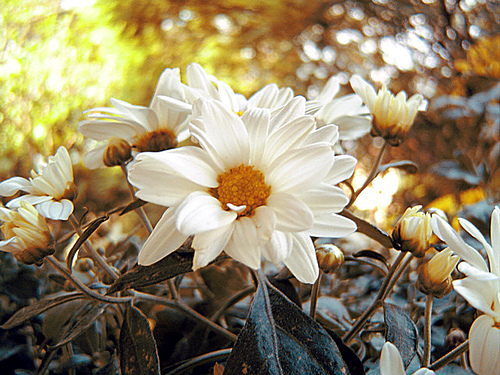

In [46]:
img

In [48]:
img = image.load_img(r'/content/drive/MyDrive/IBM Assignment/flowers/daisy/54377391_15648e8d18.jpg',target_size=(64,64))

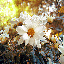

In [49]:
img

In [51]:
x=image.img_to_array(img)

In [52]:
x

array([[[223., 233., 100.],
        [241., 255., 124.],
        [231., 254., 114.],
        ...,
        [167., 165., 144.],
        [115., 110., 106.],
        [ 80.,  85.,  89.]],

       [[225., 237., 137.],
        [249., 253., 169.],
        [248., 255., 187.],
        ...,
        [133., 100.,  67.],
        [130., 132., 121.],
        [131.,  95.,  61.]],

       [[233., 252., 127.],
        [229., 226., 129.],
        [240., 246., 172.],
        ...,
        [132., 111.,  90.],
        [ 85.,  75.,  65.],
        [121., 111., 120.]],

       ...,

       [[  4.,   3.,  21.],
        [  0.,   1.,   5.],
        [  0.,   0.,  12.],
        ...,
        [131., 121., 120.],
        [156., 140., 127.],
        [147., 142., 138.]],

       [[  0.,   0.,  11.],
        [  0.,   0.,  10.],
        [  1.,   1.,  13.],
        ...,
        [132., 119., 100.],
        [142., 126., 103.],
        [146., 119.,  98.]],

       [[  0.,   0.,   8.],
        [  2.,   0.,  13.],
        [ 55.,  

In [53]:
x.shape

(64, 64, 3)

In [54]:
x= np.expand_dims(x,axis=0)

In [55]:
y = np.argmax(model.predict(x), axis=1)

In [57]:
y

array([3])

In [58]:
x_train.class_indices

{}

In [59]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [60]:
index[y[0]]

'sunflower'

In [61]:
index[3]

'sunflower'